## In this lab we will create a database and some tables in the Glue data catalog via SQL, using Athena.

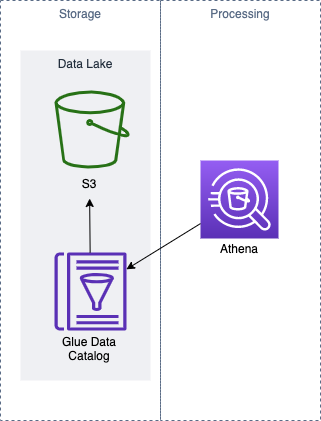

## 1) Install Pythena

In [ ]:
!pip install pythena

In [ ]:
import boto3
import os
import pythena

In [ ]:
import simplejson
with open('/opt/ml/metadata/resource-metadata.json') as fh:
    metadata = simplejson.loads(fh.read())
accountid = metadata['ResourceArn'].split(':')[4]

%set_env accountid={accountid}
%set_env bucket_name=lab-{accountid}
bucket_name = os.getenv('bucket_name')
print(bucket_name)

import boto3

client = boto3.client('athena', region_name="us-east-2")

## 2) Drop database and tables, if they exist...

In [ ]:
client.start_query_execution(
    QueryString='drop database movielens',
    ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})

client.start_query_execution(
    QueryString='drop table movielens.best_movies',
    ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})

client.start_query_execution(
    QueryString='drop table movielens.movies',
    ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})

client.start_query_execution(
    QueryString='drop table movielens.ratings',
    ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})

## 3) Create database and tables on Glue Catalog

In [ ]:
client.start_query_execution(
    QueryString='create database movielens',
    ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})

In [ ]:
with open('create_best_movies.sql') as ddl:
    client.start_query_execution(
        QueryString=ddl.read().format(bucket_name), 
        ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})

In [ ]:
with open('create_movies.sql') as ddl:
    client.start_query_execution(
        QueryString=ddl.read().format(bucket_name), 
        ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})

In [ ]:
with open('create_ratings.sql') as ddl:
    client.start_query_execution(
        QueryString=ddl.read().format(bucket_name),
        ResultConfiguration={'OutputLocation': 's3://' + bucket_name + '/output/'})